### Парсим данные

In [1]:
# from src.utils.parser import parse_snp500

# parse_snp500(
#     path_to_save='data/',
#     timeframe='1d',
#     start_date='2020-01-01',
#     history_len=256,
#     target_len=32,
#     split_coef=0.1,
# )

In [1]:
from src.utils.dataset import TradingDataset, TradingNormalizer

normalizer = TradingNormalizer(method='z-score', history_len=256)

dataset = TradingDataset(
    data_path='data/',
    mode='train',
    history_len=256, 
    target_len=32,
    normalizer=normalizer,
)

/Users/honeysuckle/dev/TradingDiffusion/.TradingGDT_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 507130 samples for train mode


History shape: torch.Size([1, 256, 5])
Target shape: torch.Size([1, 32, 1])
Ticker: WSM
Stats: {'mean_0': np.float32(106.52902), 'std_0': np.float32(32.508186), 'mean_1': np.float32(108.23948), 'std_1': np.float32(33.13773), 'mean_2': np.float32(105.05126), 'std_2': np.float32(31.766254), 'mean_3': np.float32(106.73607), 'std_3': np.float32(32.371647), 'mean_4': np.float32(2.0464282e+06), 'std_4': np.float32(1.3862541e+06)}


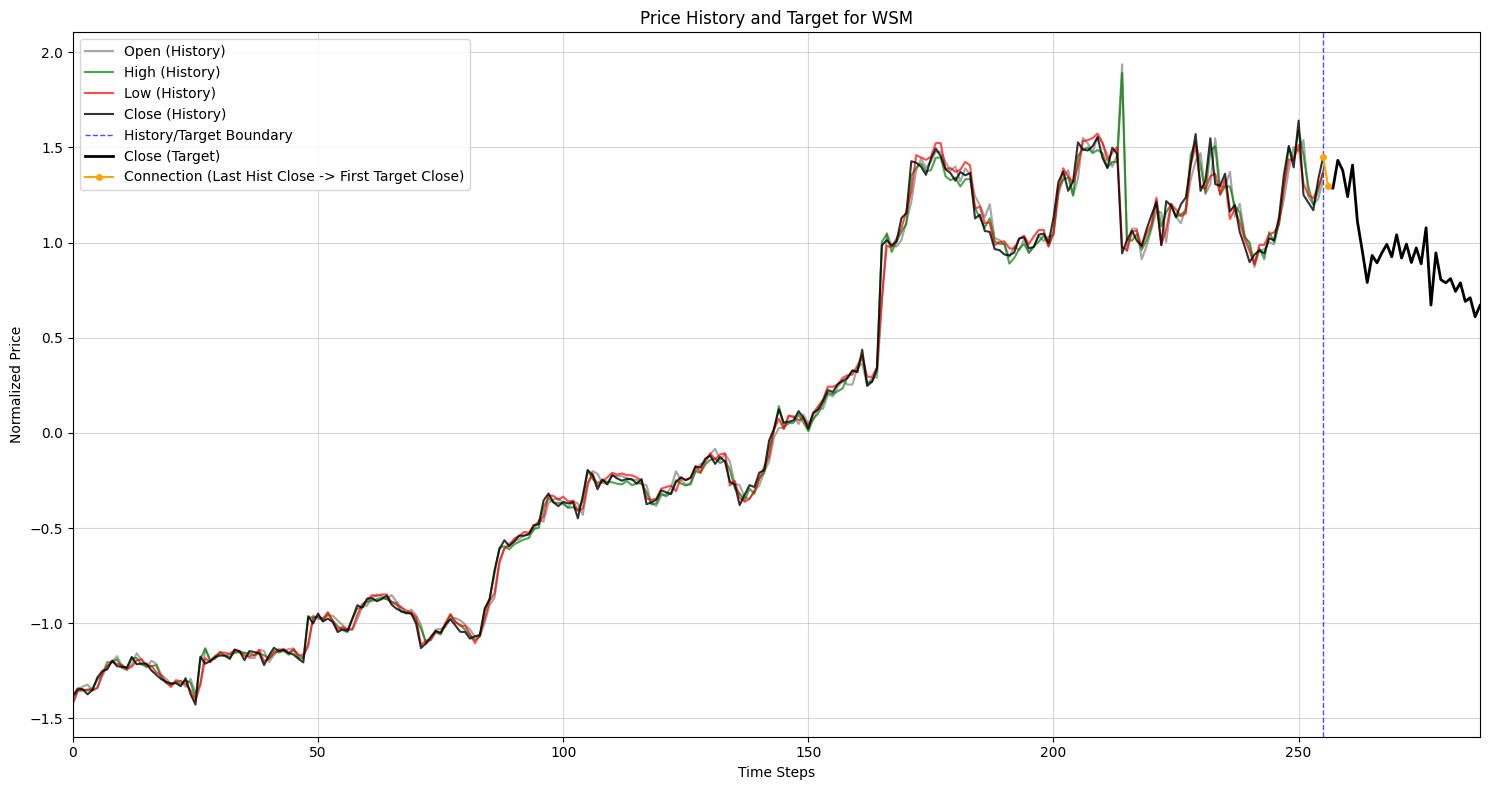

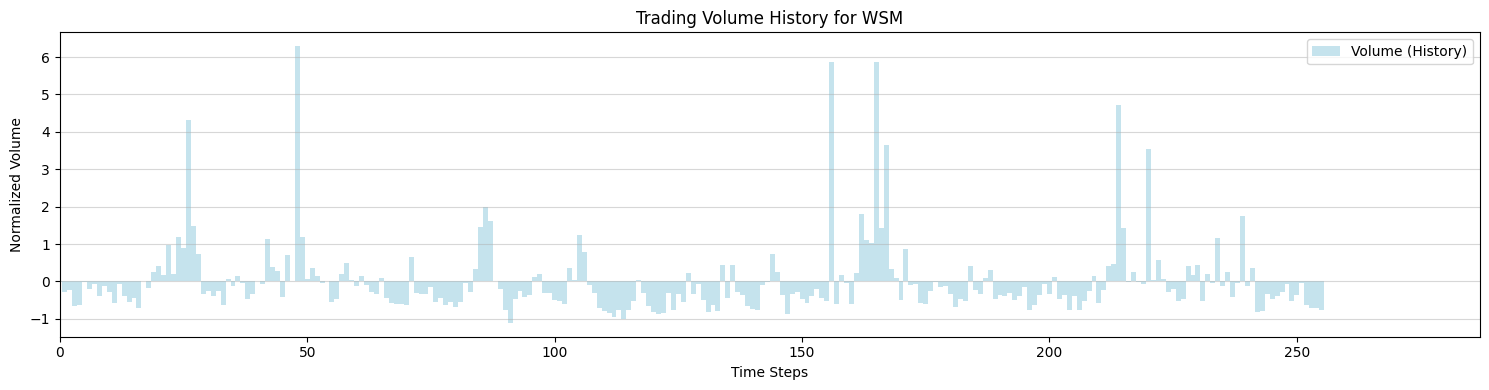

In [6]:
import torch
from src.utils.visualization import plot_dataset_sample, plot_denormalized_sample
from diffusers import DDPMScheduler


idx = torch.randint(0, len(dataset), (1,)).item()
sample = dataset[idx]
print(f"History shape: {sample['history'].shape}")
print(f"Target shape: {sample['target'].shape}")
print(f"Ticker: {sample['ticker']}")
print(f"Stats: {sample['stats']}")


plot_dataset_sample(sample)
# plot_denormalized_sample(sample)

### Проверка Scheduler

884


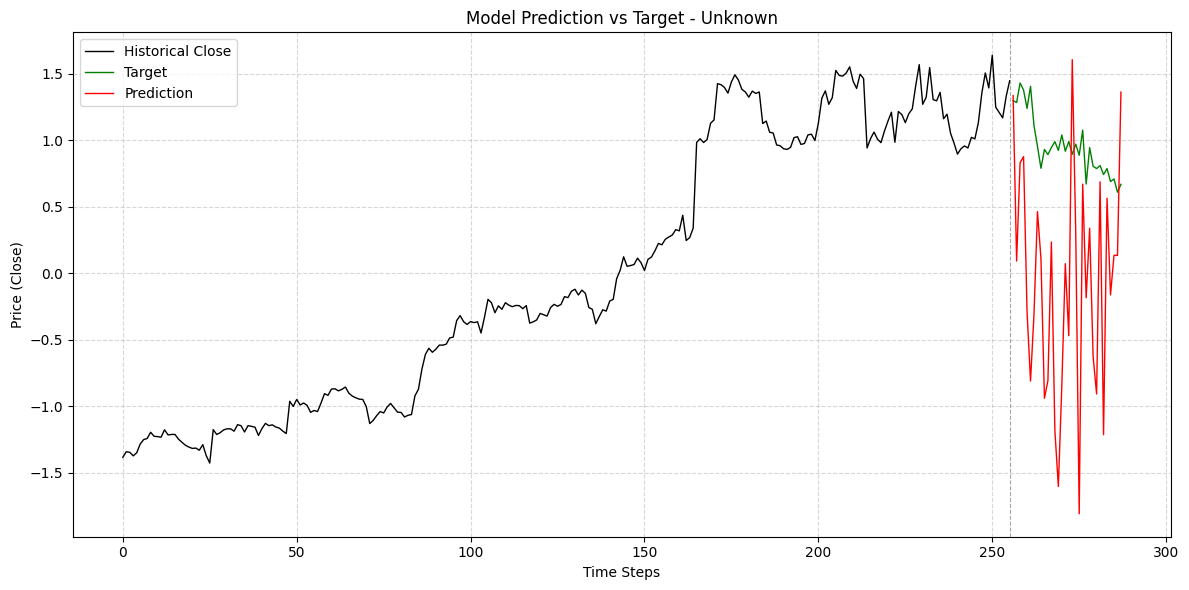

In [47]:
from diffusers import DDPMScheduler
from src.utils.visualization import plot_model_prediction

scheduler = DDPMScheduler()
timestep = torch.randint(0, 1000, (1,))
noisy = scheduler.add_noise(sample['target'], torch.randn_like(sample['target']), timestep)

print(timestep.item())
plot_model_prediction(sample['history'], sample['target'], noisy)
# plot_model_prediction(sample['history'], noisy, noisy)